### Code different from the ones in slide: Replaced curved roads by straight roads and included all different simulations

### Classes evolve throughout code:Use appropriate version to run

Librairies

In [2]:
import pygame as pg,sys,random
from pygame.locals import QUIT
import numpy as np
import math
import numpy.linalg as alg
import matplotlib.pyplot as plt
import asyncio
from IPython.display import display,clear_output
%gui asyncio 

pygame 2.5.2 (SDL 2.28.3, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


Color values

In [3]:
red=(255,0,0)
dgrey=(140,140,140)
lgray=(195,195,195)
black=(0,0,0)
white=(255,255,255)
green=(0,200,0)
yellow=(255,255,0)

IDM parameters

In [4]:
delta=4
vmax=30
dmin=100
dmin_insert=70

Other useful constants

In [5]:
c_overlap_back,c_overlap_front,c_insert=80,50,80 #Constants used in overlapping situations.
alpha=5
d_exit_min=15
cexit=10
c_insert0=30
overlapping_cooldown=9 #Necessary to add realism
altrusitc_c=700 #If car at distance < 700 from altrustic on adjacent road-> not overlapping

Defining vehicules

In [6]:
class vehicle:
    def __init__(self,a,v,x,size,T,b,amax):
        self.x=x
        self.v=v
        self.a=a
        self.size=size
        self.T=T
        self.b=b
        self.amax=amax

    #Interaction cinematic update function using euler's method
    def update_v(self,si,dvi):
        self.a=self.amax*(1-((self.v/vmax)**delta)-((dmin+self.v*self.T+((self.v*dvi)/(2*np.sqrt(self.amax*self.b))))/si)**2)
        
        # This test is to avoid having diverging pace and acceleration values
        if self.v+self.a*dt<0:
            self.x -= 1/2*self.v*self.v/self.a
            self.v=0
        else:
            # Taylor approx (Euler method)
            self.v+=self.a*dt
            self.x+=self.v*dt +self.a*dt*dt/2
            if (self.v<=vmax/10):
                self.stop=True
            else:
                self.stop=False

    #Update function on free road
    def update_free(self):
        self.a=self.amax*(1-(self.v/vmax)**delta)
        self.v+=self.a*dt
        self.x+=self.v*dt+self.a*dt*dt/2


def generate_car():
    # Generating random parameters (see PDF)
    amax=max(0,np.random.normal(2,0.2)) #mean value bigger than in theory because we're on small road segments
    b=max(np.random.normal(1.67,0.2),0)
    T=max(np.random.normal(1.6,0.5),0)
    return vehicle(0,0,0,20,T,b,amax)

generate_car()

Defining roads

In [7]:
class road:
    def __init__(self,vlist,pos):
        self.pos=pos
        self.vlist=vlist
    
    def update(self,stopped=[]):
        #Updating every car's parameters
        n=len(self.vlist)
        if n>0:
            if self.vlist[0] not in stopped:
                self.vlist[0].update_free()
            for i in range(1,n):
                v1,v2=self.vlist[i-1],self.vlist[i]
                if self.vlist[i] not in stopped:
                    self.vlist[i].update_v(v1.x-v2.x,abs(v1.v-v2.v))

    def draw_vehicles(self):
        #Drawing function
        pg.draw.rect(SURF,dgrey,[0,self.pos,width+200,40])
        for v in self.vlist:
            pg.draw.rect(SURF,red,[v.x,self.pos+10,v.size,10])

Creating graphics interface using pygame

In [10]:
width,height=1600,1000
pg.init()
SURF=pg.display.set_mode((width,height))

## WARNING: don't close pygame window

Blank window

In [ ]:

while(True):
    SURF.fill(lgray)
    pg.display.update()



## One road testing: interaction and free situations

Added road

In [ ]:
r=road([],500)
while(True):
    SURF.fill(lgray)
    r.draw_vehicles()
    pg.display.update()


Interaction Situation

Added cars: Press s to run

In [ ]:
v1,v2=generate_car(),vehicle(0,0,1000,20,1,1,1)
r=road([v2,v1],500)
run=False
dt=0.025

t=0
lim=100
postab=[]
vtab=[]

while(True):
    SURF.fill(lgray)
    for event in pg.event.get(): 
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s: #Click s to run simulation
                run=True
    r.draw_vehicles() # drawing function
    if t<lim and run:
        postab.append(v1.x) # Position values
        vtab.append(v1.v) # Speed values
        t+=dt #Updating time
    if t>=lim and run:
        print('charts complete')
        run=False
    if run:
        r.update([v2]) # Updating variables
    pg.display.update()
    

Plotting position graph

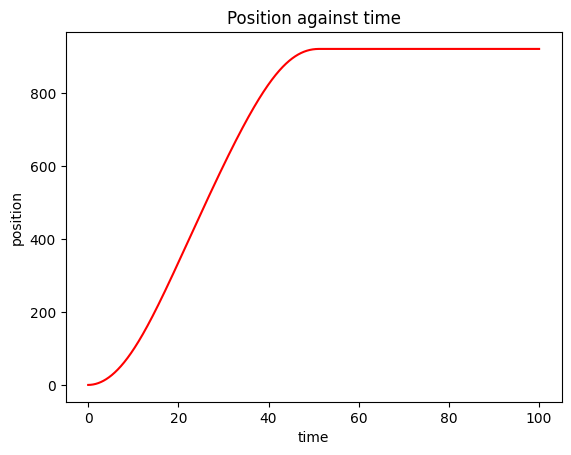

In [13]:
time=np.linspace(0,lim,int(lim/dt))
plt.plot(time,postab,color='red')
plt.xlabel('time')
plt.ylabel('position')
plt.title('Position against time')
plt.show()

Plotting velocity graph

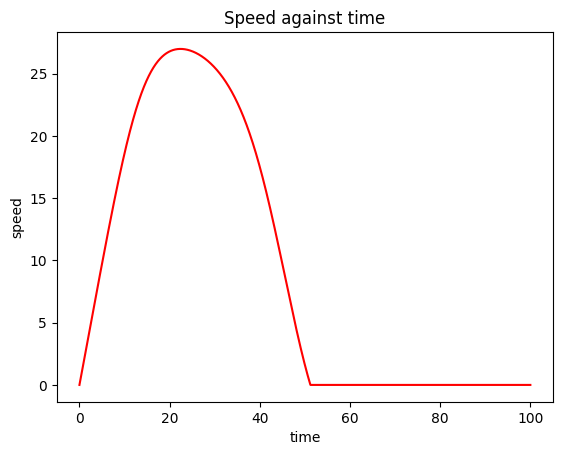

In [14]:

plt.plot(time,vtab,color='red')
plt.xlabel('time')
plt.ylabel('speed')
plt.title('Speed against time')
plt.show()

Free Road situation 

In [ ]:
v1=generate_car()
r=road([v1],500)
run=False
dt=0.025

t=0
lim=5000
postab=[]
vtab=[]

while(True):
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if t<lim and run:
        postab.append(v1.x)
        vtab.append(v1.v)
        t+=1
    if t>=lim:
        print('charts complete')
    r.draw_vehicles()
    if run:
        r.update()
    pg.display.update()
    

position graph

In [15]:
plt.rcParams.update(plt.rcParamsDefault)

In [ ]:
time=np.linspace(0,lim,lim)
plt.plot(time,postab,color='red')
plt.xlabel('time')
plt.ylabel('position')
plt.title('Position against time')
plt.show()

speed graph

In [ ]:

plt.plot(time,vtab,color='red',label='machin')
plt.plot(time,[vmax]*len(time),color='black',label='top speed')
plt.xlabel('time')
plt.ylabel('speed')
plt.title('Speed against time')
plt.show()

## Mesoscopic study

### Defining multi road system

Car generation parameters

In [14]:
mu,sigma=50,20

Time variable for generation function

In [15]:
simtime=0

In [44]:


#Need to introduce car generation cooldown

#Testing_cars argument for overlapping tests
class road2(road):
    def __init__(self, vlist, pos):
        self.vlist=vlist
        self.pos=pos
        self.seed=np.random.normal(mu,sigma,100)
    
    def gen(self,test=False): #Used test argument for testing purposes
      #This function generates cars on self according to seed
          #Checking if there's enough space to spawn a car
            def free_spawn():
                return [v for v in self.vlist if v.x<30]==[]
            for x in self.seed:
                 if abs(x-simtime)<1 and free_spawn():
                      if test or rset.graph[self]!=[]:
                        self.vlist.append(generate_car())
                        break
                      else:
                        break

    def update(self, stopped=[],test=False): # test argument for testing purposes
        self.gen(test) # Generating according to N(mu,sigma) distribution
        super().update(stopped)
        



Testing car generation

In [ ]:
r=road2([],500)
simtime=0
dt=0.1
run=False
while(True):
    pg.time.delay(20)
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        r.update(test=True)
    r.draw_vehicles()
    pg.display.update()
    



### Overlapping

Functions that will be useful in overlapping situations

In [28]:
def find_first_car(y,road,side):
    "Finds the first car on road after x=y if side='forward and first car on road before x=y otherwise"
    n=len(road.vlist)
    if side=='back':
        for car in road.vlist:
            if car.x<y:
                return car
        return vehicle2(0,0,-100,0,0,0,0,0)
    else:
        for i in range(n-1,-1,-1):
            if road.vlist[i].x>y:
                return road.vlist[i]
        return vehicle2(0,0,10000,0,0,0,0,0)
                    
def car_rank(y,road):
    m=len(road.vlist)
    for i in range(m):
        if y>road.vlist[i].x:
            return i
    return m
        

In [45]:
#Added car cooldown in generation (useful for overlapping)
#also added initial speed, acceleration for realism
def generate_car():
    amax=np.random.normal(0.73,0.2)
    b=np.random.normal(1.67,0.2)
    T=np.random.normal(1.6,0.5)
    return vehicle2(amax/2,20,0,20,T,b,amax,0)

# Added cooldown
class vehicle2(vehicle):
    def __init__(self,a,v,x,size,T,b,amax,cooldown):
        self.x=x
        self.v=v
        self.a=a
        self.size=size
        self.T=T
        self.b=b
        self.amax=amax
        self.cooldown=cooldown

    def update_v(self, si, dvi):
        if self.T!=-1:  #For testing purposes
            self.cooldown+=dt
            super().update_v(si, dvi)
    
    def update_free(self):
        if self.T!=-1:
            self.cooldown+=dt
            super().update_free()


class road_set:
    def __init__(self,rlist,graph):
        self.rlist=rlist
        self.graph=graph

    #Deleting vehicules out of screen
    def clean(self):
        for road in self.rlist:
            if road.vlist != []:
                if road.vlist[0].x>width: 
                    road.vlist.remove(road.vlist[0])




    #r1 to r2
    def overlap(self,r1,r2):
        n=len(r2.vlist)
        #Checking for all vehicles v of r1 if v can overlap on r2
        for i in range(len(r1.vlist)):
            if i in range(1,len(r1.vlist)):
                v1=r1.vlist[i]
                if v1.cooldown>overlapping_cooldown: #testing if i in range because we modify r1.vlist during iteration
                    v2=r1.vlist[i-1]
                    v3=find_first_car(v1.x,r2,'back')
                    v4=find_first_car(v1.x,r2,'front')
                    #See conditions on slide 10
                    if v1.x-v3.x>c_overlap_back and v4.x-v1.x>c_overlap_front and v2.x-v1.x<=dmin+10:
                        v1.cooldown=0
                        r2.vlist.insert(car_rank(v1.x,r2),v1)
                        r1.vlist.remove(v1)
        
    def update(self):
        for road in self.rlist:
            road.update()
        
        for k,v in self.graph.items(): #Graph structure to detail what roads are accessible from a certain road
            for road in v:
                self.overlap(k,road)

    def draw(self):
        for road in self.rlist:
            road.draw_vehicles()
    

        

In [ ]:
r1,r2,r3=road2([],500),road2([vehicle2(0,0,1000,20,-1,0,0,0)],600),road2([],700)
#Added a vehicle on r2 to force vehicles to overlap to avoid the vehicle
#This graph describes the different road switches available to cars
graph={r1:[r2],r2:[r1,r2],r3:[r2]}
rset=road_set([r1,r2,r3],graph)
run=False
simtime=0
dt=0.1
while(True):
    pg.time.delay(10)
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        rset.update()
    rset.draw()
    rset.clean()
    x,z=pg.mouse.get_pos()
    pg.display.update()


Insertion roads

Defining rotated roads

In [33]:
def draw_rotated_rect(surface,rect,angle_radians,color):
    top_left=rotate_point(rect.topleft,rect.topleft,angle_radians)
    top_right=rotate_point(rect.topright,rect.topleft,angle_radians)
    bottom_right=rotate_point(rect.bottomright,rect.topleft,angle_radians)
    bottom_left=rotate_point(rect.bottomleft,rect.topleft,angle_radians)
    vertices=(top_left,top_right,bottom_right,bottom_left)
    pg.draw.polygon(surface,color,vertices)

def rotate_point(point,origin,angle_radians):
    x,y=point[0]-origin[0],point[1]-origin[1]
    x_rotated=x*math.cos(angle_radians)-y*math.sin(angle_radians)
    y_rotated=x*math.sin(angle_radians)+y*math.cos(angle_radians)
    x_rotated+=origin[0]
    y_rotated+=origin[1]
    return round(x_rotated), round(y_rotated)

In [ ]:
testr=pg.Rect(50,50,50,20)
while(True):
    SURF.fill(lgray)
    draw_rotated_rect(SURF,testr,np.pi/4,red)
    pg.display.update()

In [58]:
font=pg.font.SysFont(None,15)
class road3(road2):
    def __init__(self, vlist, pos,angle,length):
        self.angle=angle
        self.length=length
        super().__init__(vlist, pos)

    def draw_vehicles(self):
        r=pg.Rect(0,self.pos,self.length,30)
        draw_rotated_rect(SURF,r,self.angle,dgrey)
        for v in self.vlist :
            rectv=pg.Rect(v.x*math.cos(self.angle),self.pos+10+v.x*math.sin(self.angle),v.size,10) # Changing rect to take into account inclined roads
            draw_rotated_rect(SURF,rectv,self.angle,red)
    
    
class road_set2(road_set):
    def overlap(self, r1, r2,a=-math.inf,b=math.inf):
        n=len(r2.vlist)
        #def find_first_car(y,road,side):
        #        if side=='back':
        #            for car in road.vlist:
        #                if car.x<y:
        #                    return car
        #            return vehicle2(0,0,-100,0,0,0,0,0)
        #        else:
        #            for i in range(n-1,-1,-1):
        #                if r2.vlist[i].x>y:
        #                    return r2.vlist[i]
        #            return vehicle2(0,0,10000,0,0,0,0,0)
        #def car_rank(y,road):
        #    m=len(road.vlist)
        #    for i in range(m):
        #        if y>road.vlist[i].x:
        #            return i
        #    return m
        for i in range(len(r1.vlist)):
            if i in range(1,len(r1.vlist)):
                v1=r1.vlist[i]
                if v1.cooldown>overlapping_cooldown:
                    if i==1 or (r1 not in insertion_roads):
                        v2=r1.vlist[i-1]
                        v3=find_first_car(v1.x*np.cos(r1.angle),r2,'back')
                        v4=find_first_car(v1.x*np.cos(r1.angle) ,r2,'front')
                        if v1.x*np.cos(r1.angle)-v3.x>c_overlap_back and v4.x-v1.x*np.cos(r1.angle)>c_overlap_front and v2.x-v1.x<=dmin+10:
                            v1.cooldown=0
                            v1.x=v1.x*np.cos(r1.angle)
                            r2.vlist.insert(car_rank(v1.x,r2),v1)
                            r1.vlist.remove(v1)

    
    
    def update(self):
        for road in self.rlist:
            road.update()
        for k,v in self.graph.items():
            for road in v:  
                self.overlap(k,road)
        



In [36]:
insertion_roads=[r1]

In [ ]:
r1,r2=road3([vehicle2(0,0,730,0,-1,0,0,0)],0,np.pi/4,700),road3([],500,0,width+200)
graph={r1:[r2],r2:[r2]}
rset=road_set2([r1,r2],graph)
run=False
simtime=0
dt=0.1
while(True):
    pg.time.delay(10)
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        rset.update()
    rset.draw()
    rset.clean()
    pg.display.update()
    

# User behavior study

### Initial situation with 'greedy' behavior

function used to find in which lane is the car (used in vehicle class)

In [49]:
def find_road(car):
    for r in rset.rlist:
        if car in r.vlist:
            return r

In [50]:
#Finding graph values
vl=[]
for l in graph.values():
    for r in l:
        vl.append(r)
vl=set(vl)

insertion_roads=[r for r in rset.rlist if (r in graph.keys()) and r not in vl]
insertion_roads

In [68]:


class vehicle3(vehicle2):
#Adding behavior related parameters
    def __init__(self, a, v, x, size, T, b, amax, cooldown,path,behavior):
        self.path=path #Road that the car wants to end up on
        self.behavior=behavior 
        super().__init__(a, v, x, size, T, b, amax, cooldown)

#slide 16/23
    def update_free(self):
        #Modifying free road update function to take into account the fact that the vehicle wants to end up at its destination
        #If altruistic
        if self.behavior!=red:
            #This parameter is to ensure that we don't do 2 update steps simultaneaously
            b=0
            rself=find_road(self)
            if rself not in insertion_roads:
                for r in graph[rself]:
                    #Slowing down to try to insert behind car on desired road
                    if r!=rself:
                        car=find_first_car(self.x,r,'front')
                        if car.x-self.x<30 and abs(car.v)<0.01 and b==0:
                            super().update_v(car.x-self.x,self.v)
                            b=1
        if self.behavior==red or b==0: 
            if self in self.path.vlist or self.x>width-100: #Checking if we're not on an insertion road or that the car is already to far forward
                super().update_free()
            else:
                #Slowing down at the end of the road
                super().update_v(width-self.x,self.v)

#slide 16/23
    def update_v(self, si, dvi):
        if self.behavior==red:
            super().update_v(si, dvi)
        else:
            b=0
            rself=find_road(self)
            if rself not in insertion_roads:
                for r in graph[rself]:
                    if r!=rself:
                        car=find_first_car(self.x,r,'front')
                        # if car on adjacent road is closer than car in front and car on adjacent road is stopped
                        if car.x-self.x<si and abs(dvi-self.v)<0.01 and b==0:
                            super().update_v(car.x-self.x,self.v)
                            b=1
            if b==0:
                super().update_v(si,dvi)
    

    


class road4(road3):

    def draw_vehicles(self):
        r=pg.Rect(0,self.pos,self.length,30)
        draw_rotated_rect(SURF,r,self.angle,dgrey)
        for v in self.vlist :
            b=0
            if self.angle!=0:
                b=1
            rectv=pg.Rect(v.x*math.cos(self.angle),self.pos+10+v.x*math.sin(self.angle),v.size,10)
            draw_rotated_rect(SURF,rectv,self.angle,v.behavior)
            img=font.render(str(rset.rlist.index(v.path)),True,black)
            SURF.blit(img,(v.x*np.cos(self.angle),self.pos+v.x*np.sin(self.angle))) #Adding car paths for visibility
            


class road_set2(road_set2):
    def overlap(self, r1, r2,a=-math.inf,b=math.inf):
        n=len(r2.vlist)
        for i in range(len(r1.vlist)):
    #Make sure that i is in acceptable range (r1.vlist changes during iterations so necessary )
            if i in range(0,len(r1.vlist)): 
    #Added this condition to make sure that second property of slide 16 respected
                v1=r1.vlist[i]
                if not(v1.behavior==green and abs(find_first_car(v1.x,r2,'back').x-v1.x)<250):
                    if i in range(0,len(r1.vlist)) and v1.cooldown>overlapping_cooldown and abs(r1.pos-v1.path.pos)-abs(r2.pos-v1.path.pos)>0:
                        if i==1 or (r1 not in insertion_roads):
                            v1,v2=r1.vlist[i],r1.vlist[i-1]
                            v3=find_first_car(v1.x*np.cos(r1.angle),r2,'back')
                            v4=find_first_car(v1.x*np.cos(r1.angle) ,r2,'front')
                            if v1.x*np.cos(r1.angle)-v3.x>c_overlap_back and v4.x-v1.x*np.cos(r1.angle)>c_overlap_front and v2.x-v1.x<=dmin+10:
                                v1.cooldown=0
                                v1.x=v1.x*np.cos(r1.angle)
                                r2.vlist.insert(car_rank(v1.x,r2),v1)
                                r1.vlist.remove(v1)

def generate_car(road=None):
    amax=np.random.normal(0.73,0.2)
    b=np.random.normal(1.67,0.2)
    T=np.random.normal(1.6,0.5)
    rset.con+=1
#to consider isolated roads
    if list(graph.values())!=[[]]:
        return vehicle3(amax/2,20,0,20,T,b,amax,0,random.choice(random.choice(list(graph.values()))),gen_seed())
    else:
        return vehicle3(amax/2,20,0,20,T,b,amax,0,road,gen_seed())
        




car behavior distribution function

In [52]:
def gen_seed():
    return red

Adding precision and congestion parameters to rset

In [56]:
class road_set3(road_set2):
    def __init__(self, rlist, graph):
        self.good=0
        self.bad=0
        self.con=0
        super().__init__(rlist, graph)
    
#When deleting vehicle (end of road), checking if vehicle in good lane
    def clean(self):
        for road in self.rlist:
            if road.vlist != []:
                car=road.vlist[0]
                if car.x>width:
                    if car in car.path.vlist:
                        self.good+=1
                    else:
                        self.bad+=1
                    road.vlist.remove(road.vlist[0])
                    self.con-=1



In [ ]:
r2=road4([],500,0,width+200)
r1=road4([vehicle3(0,0,730,0,-1,0,0,0,r2,green)],0,np.pi/4,700)
r3,r4=road4([],600,0,width+200),road4([],700,0,width+200)
graph={r1:[r2],r2:[r3],r3:[r2,r4],r4:[r3]}
rset=road_set3([r1,r2,r3,r4],graph)
run=False
simtime=0
dt=0.1
precision_values=[]
loss_values=[]
congestion_values=[]
time_values=[]
while(True):
    time_values.append(simtime) 
    precision_values.append(rset.good) 
    loss_values.append(rset.bad)
    congestion_values.append(rset.con)
    pg.time.delay(10)
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        
        rset.update()
    rset.draw()
    rset.clean()
    pg.display.update()

plotting precision and congestion values

In [ ]:
plt.plot(time_values,precision_values,'-b',label='precision')
plt.plot(time_values,congestion_values,'-r',label='congestion')
plt.plot(time_values,loss_values,label='loss')
plt.axvline(mu,label='$\mu$')
plt.title('Congestion,precision and loss over time in greedy paradigm')
plt.xlabel('time')
plt.ylabel('number of cars')
plt.legend()

Perfect precision but congestion for 200 seconds+

### Now same experiment but with altruistic behavior

In [61]:
def gen_seed():
    return green

In [ ]:
r2=road4([],500,0,width+200)
r1=road4([vehicle3(0,0,730,0,-1,0,0,0,r2,green)],0,np.pi/4,700)
r3,r4=road4([],600,0,width+200),road4([],700,0,width+200)
graph={r1:[r2],r2:[r3],r3:[r2,r4],r4:[r3]}
rset=road_set3([r1,r2,r3,r4],graph)

rset.bad,rset.good,rset.con=0,0,0
run=False
simtime=0
dt=0.1
precision_values=[]
loss_values=[]
congestion_values=[]
time_values=[]
while(True):
    time_values.append(simtime)
    precision_values.append(rset.good)
    loss_values.append(rset.bad)
    congestion_values.append(rset.con)
    pg.time.delay(10)
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        
        rset.update()
    rset.draw()
    rset.clean()
    pg.display.update()

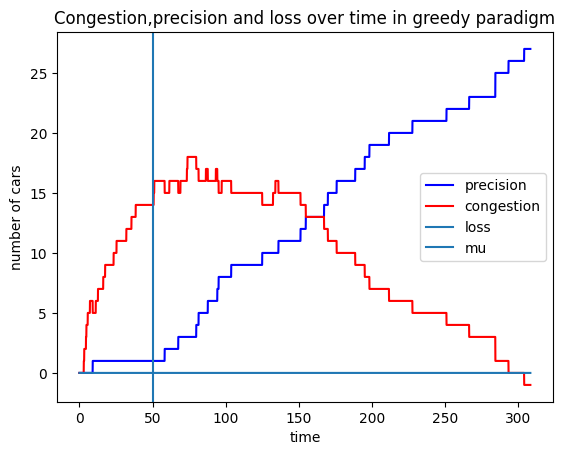

In [ ]:
plt.plot(time_values,precision_values,'-b',label='precision')
plt.plot(time_values,congestion_values,'-r',label='congestion')
plt.plot(time_values,loss_values,label='loss')
plt.axvline(mu,label='mu')
plt.title('Congestion,precision and loss over time in greedy paradigm')
plt.xlabel('time')
plt.ylabel('number of cars')
plt.legend()

Congestion curve decreases much faster than in case where all cars are egoistic

The reason why we see good precision contrary to what the slides indicate is due to a code modification done in this version: Cars slow down nearing the end of the road and are thus able to get to their destination

Because of this modification, it is no longer necessary to introduce variable behavior, as its ouput will necessarily be worse than an all altruistic case

# Smart lights

To emulate how lights work with our model, we'll consider that a light acts as a motionless car relatively to the cars on a certain road.

When the light turns to green, this car is 'removed'

In [69]:
green_time=50
yellow_time=10
red_time=50


road position becomes a vector and not simply its y coordinate because roads will be starting from all directions.

In [104]:

class road5(road4):
    def __init__(self, vlist, pos, angle, length):
        self.light,self.time=None,0
        self.opposite=None
        super().__init__(vlist, pos, angle, length)

    def update(self, stopped=[]):
        #Updating clock only if running the light algorithm ie when the opposite light is red 
        if self.opposite==None or self.opposite.light==red:
            self.time+=dt
        else:
            self.time=0
        if self.light !=None:
            self.update_light()
        super().update(stopped)

    #First algorithm implementation
    def update_light(self):
        if self.opposite==None or self.opposite.light==red:
            if self.time<green_time:
                self.light=green
            elif self.time<green_time+yellow_time:
                self.light=yellow
            elif self.time<green_time+yellow_time+red_time:
                self.light=red
            else:
                self.time=0
        else:
            self.light=red

    def draw_vehicles(self):
        x,y=self.pos
        r=pg.Rect(x,y,self.length,30)
        draw_rotated_rect(SURF,r,self.angle,dgrey)
        #Drawing light
        if self.light !=None:
            light=pg.Rect(x+(20+self.length)*np.cos(self.angle),y+(20+self.length)*(np.sin(self.angle)),10,30)
            draw_rotated_rect(SURF,light,self.angle,self.light)
        #Drawing vehicles       
        for v in self.vlist :
            rectv=pg.Rect((v.x)*math.cos(self.angle)+x - 10*np.sin(self.angle),y+((v.x))*math.sin(self.angle)+10*np.cos(self.angle),v.size,10)
            draw_rotated_rect(SURF,rectv,self.angle,v.behavior)
            img=font.render(str(rset.rlist.index(v.path)),True,black)
            SURF.blit(img,(v.x*np.cos(self.angle)+x,y+v.x*np.sin(self.angle)))
        
class road_set4(road_set3):
    def overlap(self, r1, r2,a=-math.inf,b=math.inf):
        if r1!=r2:
            n=len(r2.vlist)
            for i in range(len(r1.vlist)):
        #Make sure that i is in acceptable range (r1.vlist changes during iterations so necessary )
                if i in range(0,len(r1.vlist)): 
        #Added this condition to make sure that second property of slide 16 respected
                    v1=r1.vlist[i]
                    if not(v1.behavior==green and abs(find_first_car(v1.x,r2,'back').x-v1.x)<250):
                        #####Modified this line
                        if i in range(0,len(r1.vlist)) and v1.cooldown>overlapping_cooldown and abs(r1.pos[0]-v1.path.pos[0])-abs(r2.pos[0]-v1.path.pos[0])>0:
                            if i==1 or (r1 not in insertion_roads):
                                v1,v2=r1.vlist[i],r1.vlist[i-1]
                                v3=find_first_car(v1.x*np.cos(r1.angle),r2,'back')
                                v4=find_first_car(v1.x*np.cos(r1.angle) ,r2,'front')
                                if v1.x*np.cos(r1.angle)-v3.x>c_overlap_back and v4.x-v1.x*np.cos(r1.angle)>c_overlap_front and v2.x-v1.x<=dmin+10:
                                    v1.cooldown=0
                                    v1.x=v1.x*np.cos(r1.angle)
                                    r2.vlist.insert(car_rank(v1.x,r2),v1)
                                    r1.vlist.remove(v1)
                                    
                                    
    
    
    
class vehicle4(vehicle3):
    #Adapting car parameters update to stop at red lights
    def update_v(self, si, dvi):
        r=find_road(self) 
        #Considering case where car needs to stop for  red light
        if si<r.length-self.x or self.x>r.length or find_road(self).light != red:
            super().update_v(si, dvi)
        else :
            super().update_v(r.length-self.x,self.v)
            
    def update_free(self):
        #Considering case where car needs to stop for  red light
        if self.x>find_road(self).length or find_road(self).light !=red:
            super().update_free()
        else:
            super().update_v(find_road(self).length-self.x,self.v)
        

def generate_car(road=None):
    amax=max(0,np.random.normal(0.73,0.2))
    b=max(0,np.random.normal(1.67,0.2))
    T=max(0,np.random.normal(1.6,0.5))
    rset.con+=1
#to consider isolated roads
    if list(graph.values())!=[[]]:
        return vehicle4(amax/2,20,0,20,T,b,amax,0,random.choice(random.choice(list(graph.values()))),gen_seed())
    else:
        return vehicle4(amax/2,20,0,20,T,b,amax,0,road,gen_seed())
        
    
        

Test to see how lights work

In [ ]:
r1=road5([],(0,500),0,500)
r1.light=green
graph={r1:[r1]}
run=False
rset=road_set4([r1],graph)
simtime=0
dt=0.1
while(True):
    pg.time.delay(8)
    SURF.fill(lgray)
    x,y=pg.mouse.get_pos()
    img=font.render(str((x,y)),True,black) 
    SURF.blit(img,(x,y+20)) #To print mouse coordinates
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        
        rset.update()
    rset.draw()
    rset.clean()
    pg.display.update()


Creating intersection where lights follow first algorithm

In [109]:

class road_set5(road_set4):
    def rswitch(self,r1,r2):
    #Function to deal with how cars get to their lane of choice after running through light
        if r1.vlist!=[]:
            car=r1.vlist[0]
            #Checking if there's enough room
            if car.x-r1.length>-40 and find_first_car(0,r2,'front').x>30 and r2==car.path:
                car.x=0
                car.v/=2
                r2.vlist.append(car)
                r1.vlist.remove(car)
    
    def update(self):
        #Adding light related switches in global update functioj
        for road in self.rlist:
            road.update()
        for r,l in lightgraph.items():
            for r2 in l:
                if r.light in [green,yellow]:
                    self.rswitch(r,r2)
        for k,v in self.graph.items():
                for road in v:  
                    if k in lightgraph.keys() and road not in lightgraph[k] and k!=road:
                        self.overlap(k,road)
                    

                    

class road6(road5):
    
    
    def update(self, stopped=[]):
        #Running algorithm clock 
        if  self.opposite==None or self.opposite.light==red :
            self.time+=dt
        # If light is red then we reset algorithm clock
        else:
            self.time=0
        if self.light !=None:
            self.update_light()
        #Only generating on roads where there's a light
        if self in lightgraph.keys():
            self.gen()
        if self.vlist!=[]:
            car=self.vlist[0]
            if self.light==None:
                self.vlist[0].update_free()
            else:
                car.update_v(abs(car.x-self.length)+100,car.v)
            n=len(self.vlist)
            if n>0:
                for i in range(1,n):
                    v1,v2=self.vlist[i-1],self.vlist[i]
                    if self.vlist[i] not in stopped:
                        self.vlist[i].update_v(v1.x-v2.x,abs(v1.v-v2.v))

    def gen(self):
            def free_spawn():
                return [v for v in self.vlist if v.x<30]==[]
            for x in self.seed:
                 if abs(x-simtime)<1 and free_spawn():
                      if rset.graph[self]!=[]:
                        self.vlist.append(generate_car(self))
                        break
                      else:
                        break



def generate_car(road):
    amax=max(0,np.random.normal(0.73,0.2))
    b=max(0,np.random.normal(1.67,0.2))
    T=max(0,np.random.normal(1.6,0.5))
    rset.con+=1
#to consider isolated roads
    if list(graph.values())!=[[]]:
        return vehicle4(amax/2,20,0,20,T,b,amax,0,(random.choice((graph[road] if road  not in lightgraph.keys() else lightgraph[road]))),gen_seed())
    else:
        return vehicle4(amax/2,20,0,20,T,b,amax,0,road,gen_seed())

In [ ]:
r1=road6([],(0,540),0,700)
r2=road6([],(740,595),np.pi/2,700)
r3=road6([],(780,595),np.pi/2,700)
r4=road6([],(800,595+700),-np.pi/2,700)
r5=road6([],(840,595+700),-np.pi/2,700)
r6=road6([],(880,540),0,750)
r7=road6([],(880,500),0,750)
r8=road6([],(880+750,480),np.pi,750)
r9=road6([],(880+750,440),np.pi,750)
r10=road6([],(840,400),-np.pi/2,700)
r11=road6([],(800,400),-np.pi/2,700)
r12=road6([],(780,400-700),np.pi/2,700)
r13=road6([],(740,400-700),np.pi/2,700)
r14=road6([],(700,440),np.pi,700 )
r15=road6([],(700,480),np.pi,700 )
r16=road6([],(0,500),0,700 )

#Lightgraph considers all possible roads that car can get to after running through a light
graph={r1:[r1,r16],r2:[r2,r3],r3:[r2,r3],r4:[r4,r5],r5:[r5,r4],r6:[r6,r7],r7:[r6,r7],r8:[r8,r9],r9:[r8,r9],r10:[r10,r11],r11:[r10,r11],r12:[r12,r13],r13:[r14,r15],r14:[r14,r15],r15:[r14,r15],r16:[r1,r16]}
lightgraph={r4:[r14,r15,r11],r5:[r6,r7,r10],r8:[r2,r3,r15],r9:[r10,r11,r14],r12:[r6,r7,r3],r13:[r14,r15,r2],r16:[r10,r11,r7],r1:[r2,r3,r6]}

#To have synchronised lights
couples=np.array_split(list(lightgraph.keys()),len(lightgraph.keys())/2)
for idx,couple in enumerate(couples):
    for r in couple:
        if idx%2==0:
                r.opposite=couples[1][0]
                r.light=red
                r.seed=np.random.normal(100,20,100)
        else:
                r.opposite=couples[0][0]
                r.light=green
                r.seed=np.random.normal(300,20,100)
            
run=False
rset=road_set5([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16],graph)
simtime=0
dt=0.1
congestion_alg1=[]
while(True):
    pg.time.delay(10)
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        
        rset.update()
        congestion_alg1.append(np.sum([len(road.vlist) for road in rset.rlist]))
    rset.draw()
    rset.clean()
    x,y=pg.mouse.get_pos()
    img=font.render(str((x,y)),True,black)
    SURF.blit(img,(x,y+20))
    pg.display.update()


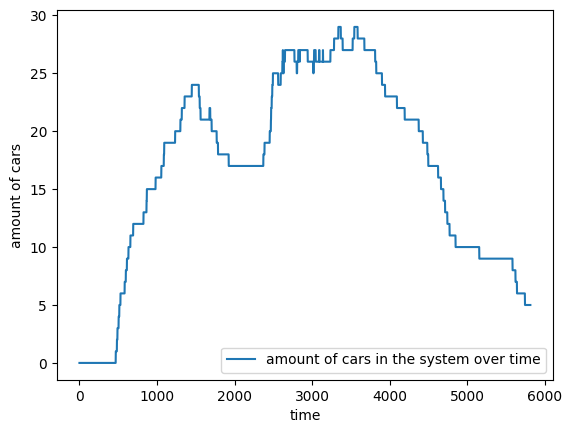

In [409]:
plt.plot(congestion_alg1,label='amount of cars in the system over time')
plt.legend()
plt.xlabel('time')
plt.ylabel('amount of cars')
plt.show()

In [333]:
l=[[1,2],[3,4]]


[([<matplotlib.lines.Line2D at 0x12244a930>], False), False]

Implementing second algorithm

In [110]:
yellow_time=10
class road7(road6):
    def __init__(self, vlist, pos, angle, length):
        self.green_time=0
        super().__init__(vlist, pos, angle, length)
    
    def update(self, stopped=[]):
        #Detecting how many cars are waiting
        if (self.opposite==None or self.opposite.light==red) and (self.light!=None)  :
            idx = list(lightgraph.keys()).index(self)
            x=list(lightgraph.keys()).index(self) + (1 if idx%2==0 else -1)
            self.green_time=10*max(len(self.vlist),len(list(lightgraph.keys())[0 if x==len(lightgraph.keys()) else x].vlist))
        else:
            self.time=0
        if self.light !=None:
            self.update_light()
        super().update(stopped)
    
    def update_light(self):
        if self.opposite.light==red or self.opposite.light==None:
            if self.time<self.green_time:
                self.light=green
            elif self.time<self.green_time+yellow_time:
                self.light=yellow
            elif self.time<self.green_time+yellow_time+red_time:
                self.light=red
            else:
                self.time=0
        else:
            self.light=red

In [ ]:
r1=road7([],(0,540),0,700)
r2=road7([],(740,595),np.pi/2,700)
r3=road7([],(780,595),np.pi/2,700)
r4=road7([],(800,595+700),-np.pi/2,700)
r5=road7([],(840,595+700),-np.pi/2,700)
r6=road7([],(880,540),0,750)
r7=road7([],(880,500),0,750)
r8=road7([],(880+750,480),np.pi,750)
r9=road7([],(880+750,440),np.pi,750)
r10=road7([],(840,400),-np.pi/2,700)
r11=road7([],(800,400),-np.pi/2,700)
r12=road7([],(780,400-700),np.pi/2,700)
r13=road7([],(740,400-700),np.pi/2,700)
r14=road7([],(700,440),np.pi,700 )
r15=road7([],(700,480),np.pi,700 )
r16=road7([],(0,500),0,700 )


graph={r1:[r1,r16],r2:[r2,r3],r3:[r2,r3],r4:[r4,r5],r5:[r5,r4],r6:[r6,r7],r7:[r6,r7],r8:[r8,r9],r9:[r8,r9],r10:[r10,r11],r11:[r10,r11],r12:[r12,r13],r13:[r14,r15],r14:[r14,r15],r15:[r14,r15],r16:[r1,r16]}
lightgraph={r4:[r14,r15,r11],r5:[r6,r7,r10],r8:[r2,r3,r15],r9:[r10,r11,r14],r12:[r6,r7,r3],r13:[r14,r15,r2],r16:[r10,r11,r7],r1:[r2,r3,r6]}
couples=np.array_split(list(lightgraph.keys()),len(lightgraph.keys())/2)
for idx,couple in enumerate(couples):
    for r in couple:
        if idx%2==0:
                r.opposite=couples[1][0]
                r.light=red
                r.seed=np.random.normal(100,20,100)
        else:
                r.opposite=couples[0][0]
                r.light=green
                r.seed=np.random.normal(300,20,100)
        

run=False
rset=road_set5([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16],graph)
simtime=0
dt=0.1
congestion_alg2=[]
while(True):
    pg.time.delay(10)
    SURF.fill(lgray)
    for event in pg.event.get():
        if event.type==pg.KEYDOWN:
            if event.key==pg.K_s:
                run=True
    if run:
        simtime+=dt
        
        rset.update()
        congestion_alg2.append(np.sum([len(road.vlist) for road in rset.rlist]))
    rset.draw()
    rset.clean()
    x,y=pg.mouse.get_pos()
    img=font.render(str((x,y)),True,black)
    SURF.blit(img,(x,y+20))
    pg.display.update()


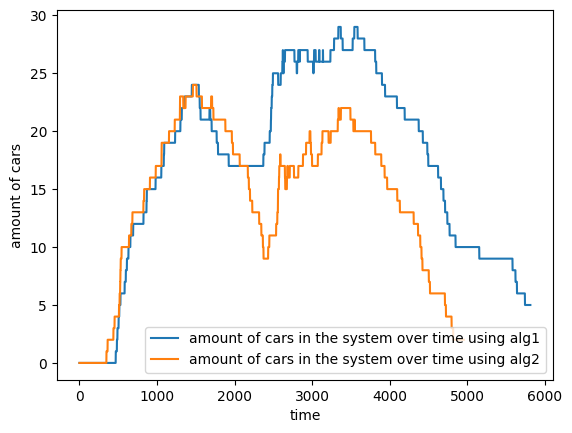

In [417]:
plt.plot(congestion_alg1,label='amount of cars in the system over time using alg1')
plt.plot(congestion_alg2,label='amount of cars in the system over time using alg2')
plt.legend()
plt.xlabel('time')
plt.ylabel('amount of cars')
plt.show()